* Inspiration from Kernels
* https://www.kaggle.com/himansh96/eda-e-commerce-dataset
* https://www.kaggle.com/aafrin/retail-rocket-recommender-system-for-beginners
* https://www.kaggle.com/johnosorio/retail-rocket-ecommerce-recommender-system


* https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada
* https://towardsdatascience.com/how-to-build-a-movie-recommender-system-in-python-using-lightfm-8fa49d7cbe3b



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./retailrocket"))

folder = "./retailrocket/"

category_tree = pd.read_csv(folder+"category_tree.csv", header= 0)
events = pd.read_csv(folder+"events.csv", header= 0)
item_properties_part1 = pd.read_csv(folder+"item_properties_part1.csv", header= 0)
item_properties_part2 = pd.read_csv(folder+"item_properties_part2.csv", header= 0)


%matplotlib inline

['category_tree.csv', 'events.csv', 'item_properties_part1.csv', 'item_properties_part2.csv']


# Viewing Events data

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN
#############
event
addtocart        69332
transaction      22457
view           2664312
dtype: int64
2664312
#############
Total number for Items: 235061


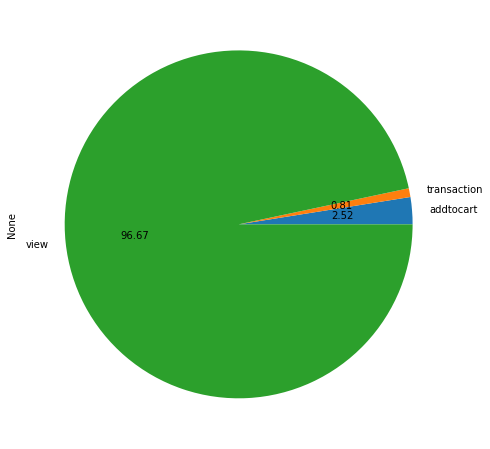

In [3]:
#print(len(events))
#events.head(5)

print(events.head(5))

print('#############')
events_info = events.groupby(['event']).size()
print(events_info)
print(events_info['view'])
print('#############')
events_item_ids = events['itemid'].unique();
print('Total number for Items: {}'.format(len(events_item_ids)))

pieC = events_info.plot.pie(subplots=True,figsize=(8, 8), labels=events_info.index, fontsize=10, autopct='%.2f')
#pieC.legends(labels=counts.index)

In [10]:
transfrom_rating = []
def transfrom_data(data_raw):
    data = data_raw.copy()
    for event in data.event:
        if(event == 'view'):
            transfrom_rating.append(1)
        if(event == 'addtocart'):
            transfrom_rating.append(2)
        if(event == 'transaction'):
            transfrom_rating.append(3)
    data['eventid']= transfrom_rating
    return data[['visitorid','itemid','eventid']]
data_surprise = transfrom_data(events)
data_surprise.head(100)

,visitorid,itemid,eventid
0,257597,355908,1
1,992329,248676,1
2,111016,318965,1
3,483717,253185,1
4,951259,367447,1
...,...,...,...
95,320957,102131,1
96,132736,67627,1
97,282587,78037,1
98,901571,458588,1


# Viewing Category Data

In [4]:
print('category data')
category_tree.head(5)

category data


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


# Concantenate Properties



In [5]:

item_properties = pd.concat([item_properties_part1, item_properties_part2])
print('Count Total Data Rows: {}'.format(item_properties['timestamp'].count()))
print(item_properties.head(5))

properties = item_properties['property'].unique()
properties_size = item_properties.groupby(['property']).size()
print('Total number for Properties: {}'.format(len(properties)))


prop_item_ids = item_properties['itemid'].unique()
print('Total number for Items: {}'.format(len(prop_item_ids)))

properties_size.sort_values(ascending=False).head(20)


item_p = item_properties.groupby(['property']).size()


Count Total Data Rows: 20275902
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513
Total number for Properties: 1104
Total number for Items: 417053


property
1091     1
769      1
1046     1
722      1
744      1
        ..
564     28
428     28
425     28
721     29
864     29
Length: 100, dtype: int64


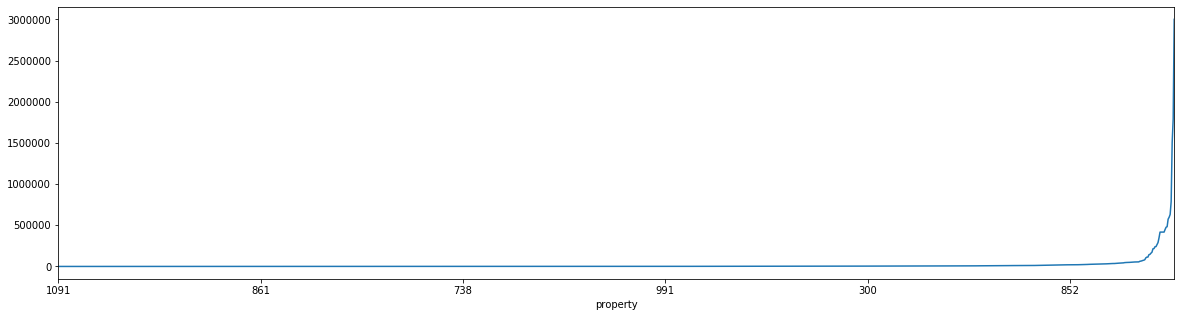

In [6]:
# Sort Values to find out the relevant Properties

item_p_sorted = item_p.sort_values()
print(item_p_sorted.head(100))

item_p_sorted.plot.line(figsize=[20, 5])

In [7]:
print(item_p_sorted.median())
item_copy = item_p_sorted.copy()
relevant_properties = item_copy.where(item_p_sorted > 881).dropna().sort_values(ascending=False).head(50)
print(relevant_properties)


880.5


property
888           3000398.0
790           1790516.0
available     1503639.0
categoryid     788214.0
6              631471.0
283            597419.0
776            574220.0
678            481966.0
364            476486.0
202            448938.0
839            417239.0
917            417227.0
159            417053.0
112            417053.0
764            417053.0
227            347492.0
698            289849.0
451            264416.0
663            240813.0
962            239372.0
400            216481.0
689            214225.0
28             172393.0
928            160818.0
1036           146246.0
810            142575.0
348            113303.0
544            113246.0
713            104931.0
1032            82805.0
19              75744.0
566             72966.0
581             68009.0
978             64569.0
981             62513.0
720             55349.0
243             54216.0
960             54141.0
46              54141.0
434             54141.0
38              54141.0
71     

# Visitor Data

In [38]:
visitors = events['visitorid']
print(visitors)
uniq_visitors = pd.Series(events['visitorid'].unique()) 
print(uniq_visitors)

visitors_viewed = events.loc[events['event'] == 'view']
print(visitors_viewed)
visitors_addtocart = events.loc[events['event'] == 'addtocart']
visitors_bought = events.loc[events['event'] == 'transaction']

print(visitors_viewed, "#####\n", visitors_addtocart, "#####\n", visitors_bought)

0           257597
1           992329
2           111016
3           483717
4           951259
            ...   
2756096     591435
2756097     762376
2756098    1251746
2756099    1184451
2756100     199536
Name: visitorid, Length: 2756101, dtype: int64
0           257597
1           992329
2           111016
3           483717
4           951259
            ...   
1407575    1392454
1407576     226214
1407577     591435
1407578     762376
1407579    1184451
Length: 1407580, dtype: int64
             timestamp  visitorid event  itemid  transactionid
0        1433221332117     257597  view  355908            NaN
1        1433224214164     992329  view  248676            NaN
2        1433221999827     111016  view  318965            NaN
3        1433221955914     483717  view  253185            NaN
4        1433221337106     951259  view  367447            NaN
...                ...        ...   ...     ...            ...
2756096  1438398785939     591435  view  261427            NaN
2

# Nächste Todos

* Item-Matrix mit ausgewählten Features
* Factorization Matrix?
* Ist visitorid ein Kunde oder nur ein Besucher? Klären?
* Relevanz von Parent-Categories
* Anbindung LightFM (oä)
